<a href="https://colab.research.google.com/github/akatjizeu/AIML_Texas_McCombs/blob/main/projects/project_6/NLP_Project_Full_Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

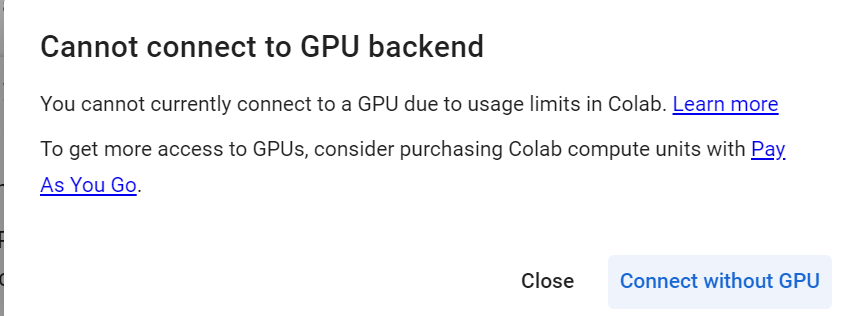

## **Installing and Importing Necessary Libraries**

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

import re

# To parse JSON data
import json

import nltk
nltk.download('stopwords')

# defining a function to remove stop words using the NLTK library
from nltk.corpus import stopwords

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# to remove common stop words
from nltk.corpus import stopwords

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

#Make the numbers to 2 decimal places
pd.options.display.float_format = lambda x: '{:.2f}'.format(x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Loading the dataset**

In [ ]:
#Load the dataset
stock = pd.read_csv('stock_news.csv')

In [ ]:
#Make a copy of the dataset
stock_copy = stock.copy()

## **Data Overview**

In [ ]:
#Display the first and last 5 rows of the dataset
pd.concat([stock_copy.head(), stock_copy.tail()])

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.74,42.24,41.48,40.25,130672400,-1
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.74,42.24,41.48,40.25,130672400,-1
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.74,42.24,41.48,40.25,130672400,-1
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.74,42.24,41.48,40.25,130672400,-1
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.74,42.24,41.48,40.25,130672400,-1
344,2019-04-30,"Media mogul Oprah Winfrey, known for influencing millions with her opinions on diets and books, is considering which Democratic presidential candidate to endorse in 2020. She told the Hollywood Reporter she's ""quietly figuring out where I'm going to use my voice"" and will make a clear announcement",50.76,50.85,49.78,48.71,186139600,-1
345,2019-04-30,"European shares fell on Tuesday, with banks underperforming amid a decline in China's manufacturing activity and awaiting euro zone economic growth numbers. The pan-European STOXX 600 index dropped 0.7% while major indices fell except London's FTSE 100. Danske Bank plunged",50.76,50.85,49.78,48.71,186139600,-1
346,2019-04-30,"This article reports that the S&P 500 reached another record high close on Tuesday, marking its best four-month stretch since late 2010. Apple's strong quarterly results and positive earnings forecast helped ease concerns about the bull run's sustainability, despite a revenue miss from Google parent Alphabet. The",50.76,50.85,49.78,48.71,186139600,-1
347,2019-04-30,"The Federal Reserve is anticipated to keep interest rates unchanged in their upcoming meeting, with a likelihood of a rate cut expected later this year. The Fed Chairman's press conference may provide significant market impact as investors seek insights on economic growth and inflation. Apple's earnings report exceeded expectations, leading to a post-market surge in shares, while",50.76,50.85,49.78,48.71,186139600,-1
348,2019-04-30,"In the first quarter, South Korea's Samsung Electronics reported its weakest profit in over two years due to falls in chip prices and slowing demand for display panels. The tech giant expects improved results in the second half of 2019, driven by a pickup in memory chip and smartphone sales. However, memory chip",50.76,50.85,49.78,48.71,186139600,0


In [ ]:
#Check the columns data types and sort by data type
stock_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


- There are 8 columns
- 2 are of Object type
- 6 are numeric, with 4 being of float data type a 2 being of int data type
- Date column must be converted to datetime


In [ ]:
#Print the number of columns and rows
print("The data has {} rows and {} columns".format(stock_copy.shape[0], stock_copy.shape[1]))

The data has 349 rows and 8 columns


In [ ]:
#Check the description of the data
stock_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.00,46.23,6.44,37.57,41.74,45.97,50.71,66.82
High,349.00,46.70,6.51,37.82,42.24,46.03,50.85,67.06
Low,349.00,45.75,6.39,37.30,41.48,45.64,49.78,65.86
Close,349.00,44.93,6.40,36.25,40.25,44.60,49.11,64.81
Volume,349.00,128948236.10,43170314.92,45448000.00,103272000.00,115627200.00,151125200.00,244439200.00
Label,349.00,-0.05,0.72,-1.00,-1.00,0.00,0.00,1.00


- The stock prices ranges from 36.25 to 67.06
- The mean volume of stocks is 128 948 236.10 which means, on average 128 million stocks were moved in a day

In [ ]:
#Check the description of object features
stock_copy.describe(include='object').T

,count,unique,top,freq
Date,349,71,2019-01-03,28
News,349,349,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",1


-  There are 349 news on the stock data
- There are 71 unique dates which means our data is from 71 days

In [ ]:
stock_copy.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


- There are no null values

In [ ]:
# Check uniqueness of values for each feature
stock_copy.nunique()

,0
Date,71
News,349
Open,70
High,70
Low,71
Close,71
Volume,71
Label,3


- There are 3 unique labels

## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

#### Observations on label  

<Axes: xlabel='Label', ylabel='count'>

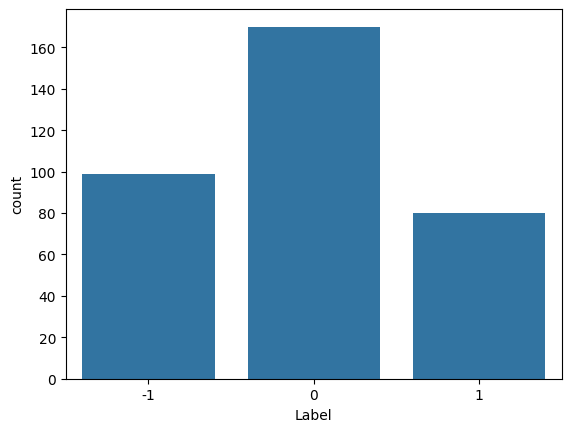

In [ ]:
sns.countplot(x=stock_copy['Label']);

- Neutral are highest with a count of more than 160
- Negative sentiments are the second highest with a little less than 100 count
- Positive comments are the least with a count of almost 80
- There is an imbalance of the sentiments

#### Density Plot of Price (Open,High,Low,Close)

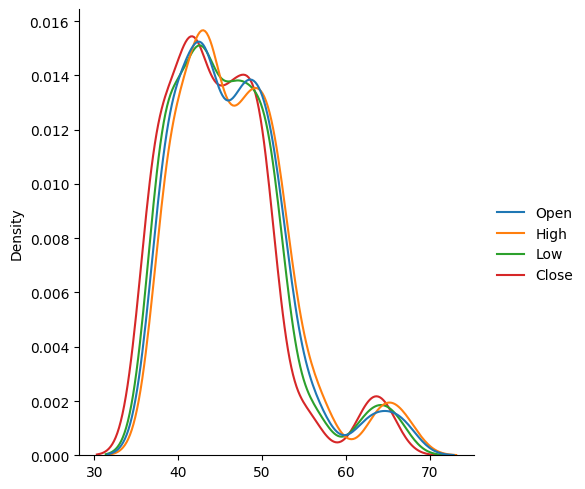

In [ ]:
# Plot a density plot of ["Open","High","Low","Close"] all in a single plot
sns.displot(stock_copy[["Open", "High", "Low", "Close"]], kind="kde");

* The plot shows the distribution of stock prices (Open, High, Low, Close) over time
* All four price types follow a similar pattern, with peaks around 45-50
* There is a slight variation in the density of High and Low prices, but they remain closely aligned
* Another smaller peak appears around 60-70, indicating another price concentration

#### Observations on volume

<Axes: xlabel='Volume', ylabel='Count'>

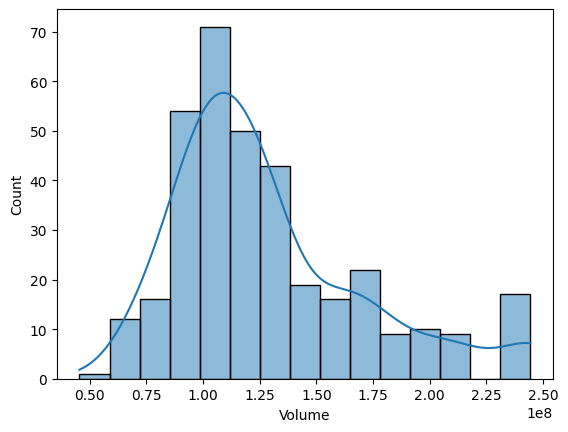

In [ ]:
sns.histplot(stock_copy['Volume'], kde=True);

* The histogram represents the distribution of trading volume over time
* Most trading volumes are concentrated around 100M–125M shares
* The distribution is right-skewed, indicating some days had significantly higher trading volumes
* There are a few outliers with trading volumes exceeding 200M shares

#### Observations on news length

In [ ]:
# Calculate the total number of words present in the news content.
stock_copy['total_words'] = stock_copy['News'].apply(lambda x: len(x.split()))

# print the statistical summary for the news content length
stock_copy['total_words'].describe().T

,total_words
count,349.00
mean,48.35
std,5.72
min,18.00
25%,45.00
50%,49.00
75%,52.00
max,60.00


* The dataset contains 349 news articles
* The average word count per article is 48.35, with a standard deviation of 5.72
* The shortest article has 18 words, while the longest has 60 words
* Most articles fall within the 45–52 word range (IQR)

<Axes: xlabel='total_words', ylabel='Count'>

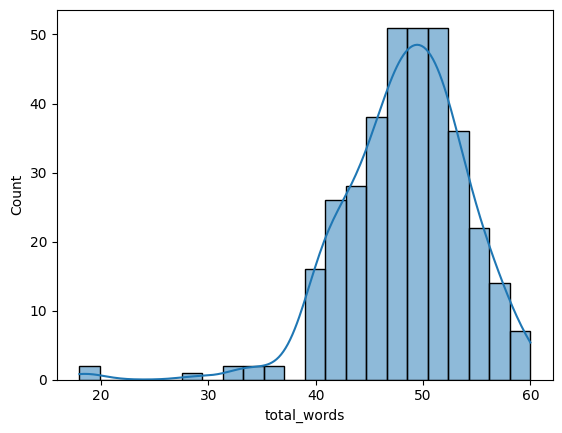

In [ ]:
# plot a histogram of news_len column
sns.histplot(stock_copy['total_words'], kde=True);

* This shows the distribution of total words per news article
* Most articles contain between 45 and 52 words, aligning with the interquartile range
* The distribution is slightly right-skewed
* The peak occurs near 50 words, indicating that most articles are close to this length

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

#### Correlation

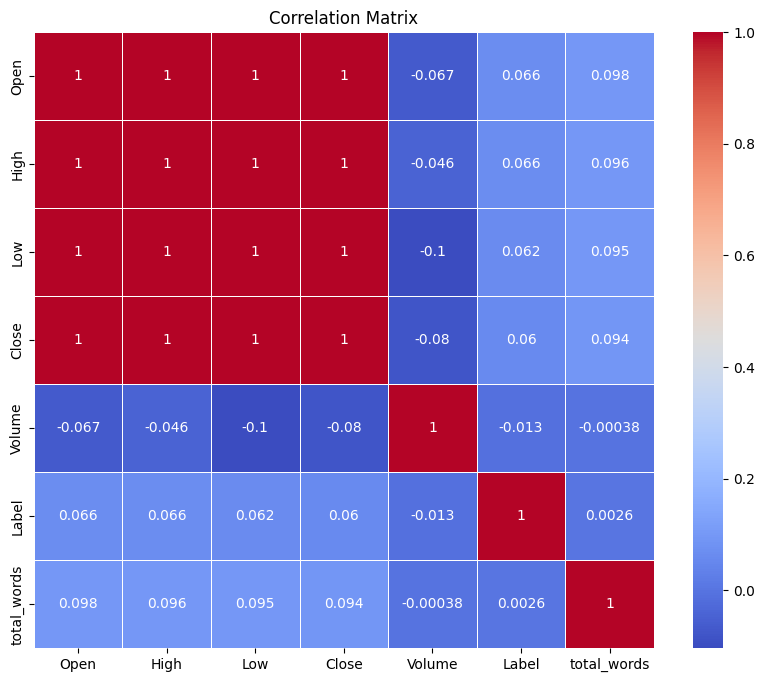

In [ ]:
# Correlation matrix for numeric columns, excluding non-numeric columns like 'Date'
corr_matrix = stock_copy.select_dtypes(include=np.number).corr()

# A heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* Label has a weak positive correlation with stock prices, suggesting that sentiment analysis could provide some insights into market movements
* Total words in news articles have a weak positive correlation with stock prices, indicating that article length may have a minor influence on stock perception
* Volume and sentiment show a near-zero correlation, implying that trading activity is not strongly driven by sentiment alone
* Total words and Label are nearly uncorrelated, meaning that the length of an article does not determine whether the sentiment is positive, neutral, or negative

#### Sentiment Polarity vs Price

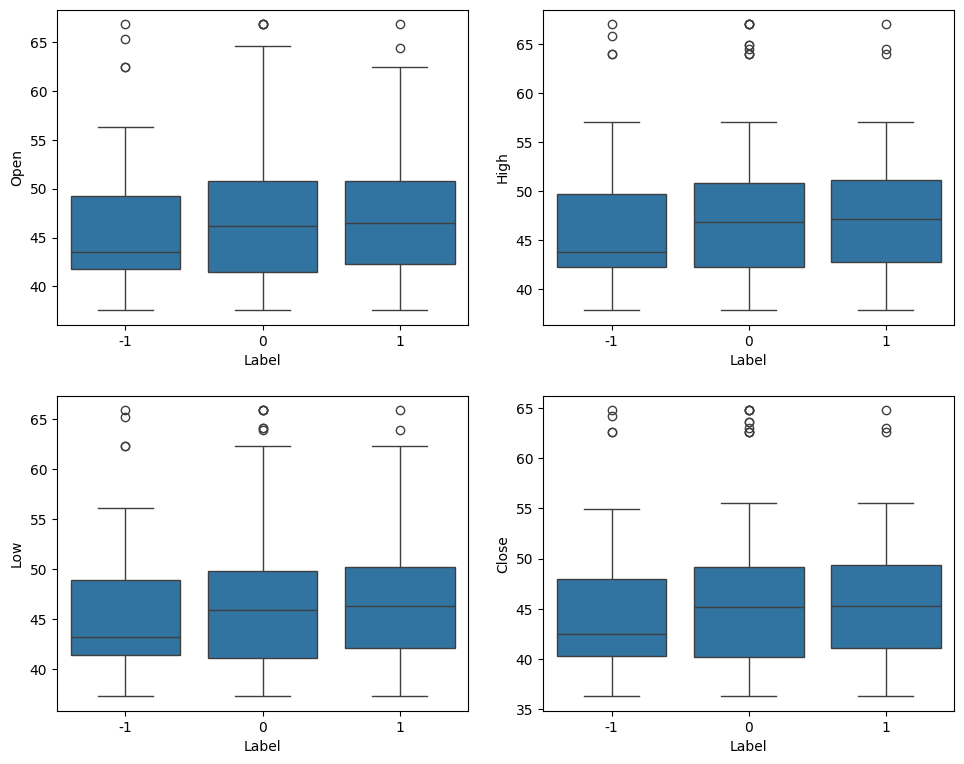

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock_copy, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

* Stock prices (Open, High, Low, Close) show minimal variation across sentiment labels (-1, 0, 1), suggesting that news sentiment has a limited direct impact on price movements
* The median stock prices remain relatively stable across all sentiment categories, indicating that positive or negative news does not drastically shift the central price tendency
* Outliers exist in all sentiment categories, meaning that extreme stock price movements occur regardless of sentiment, likely influenced by other market factors
* The interquartile range (IQR) remains consistent across sentiment labels, showing that stock price volatility is not strongly affected by sentiment alone

#### Label vs volume

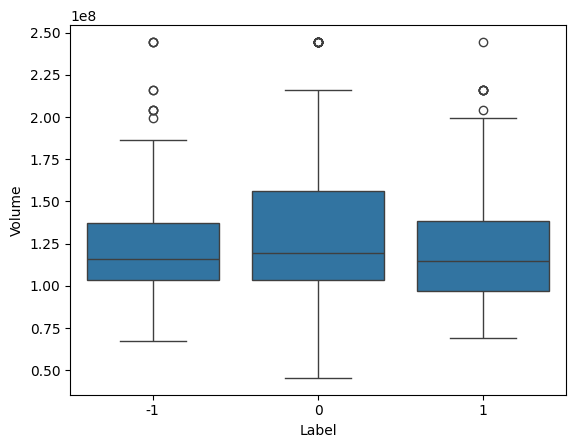

In [ ]:
sns.boxplot(data=stock_copy, x="Label", y="Volume");

* Trading volume is similar across sentiment labels (-1, 0, 1), indicating that market activity does not significantly depend on news sentiment
* The median trading volume remains consistent across sentiment categories, suggesting that investors do not drastically change their trading behavior based on sentiment
* Outliers are present in all sentiment groups, showing that extreme trading volumes occur regardless of sentiment, likely influenced by external factors
* The interquartile range (IQR) is slightly wider for neutral sentiment (0), implying that trading volume varies more when news sentiment is neutral compared to positive or negative news

#### Date vs Price (Open, High, Low, Close)

In [ ]:
stock_daily = stock_copy.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.74,42.24,41.48,40.25,130672400.00
2019-01-03,43.57,43.79,43.22,42.47,103544800.00
2019-01-04,47.91,47.92,47.10,46.42,111448000.00
2019-01-07,50.79,51.12,50.16,49.11,109012000.00
2019-01-08,53.47,54.51,51.69,50.79,216071600.00


* Stock prices show an increasing trend over the given dates, with the Open price rising from 41.74 on January 2 to 53.47 on January 8, 2019
* The High, Low, and Close prices follow a similar upward pattern, indicating consistency in the marke
* Trading volume fluctuates significantly, with a peak at 216M shares on January 8, suggesting increased market interest on that day

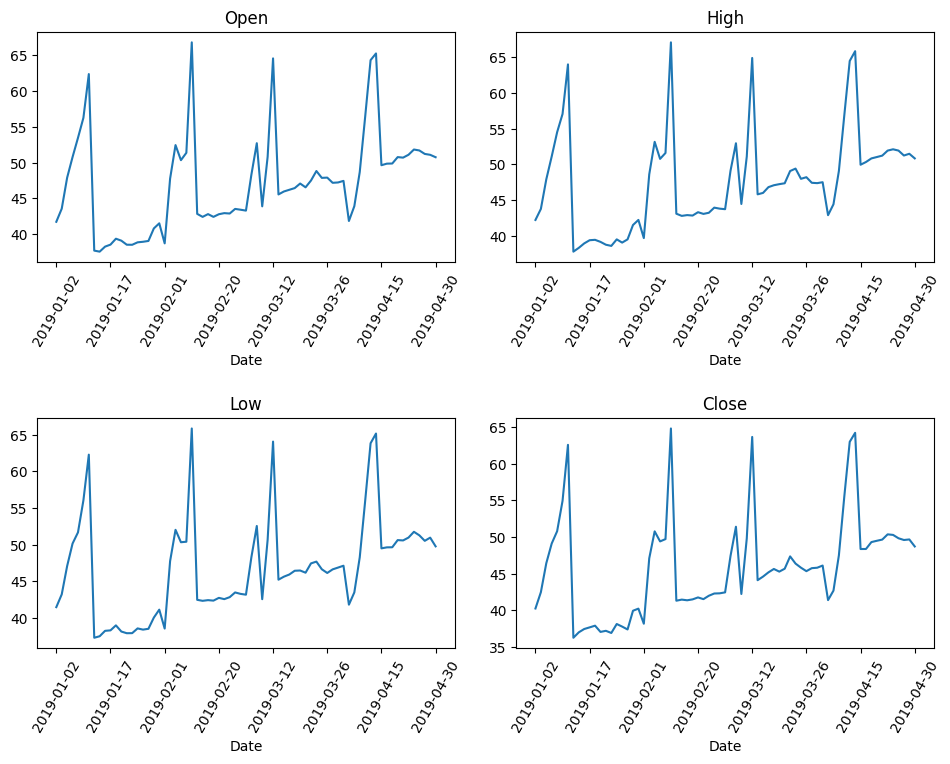

In [ ]:
# Create a lineplot of all the variables except Volume
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    stock_daily[variable].plot()
    plt.title(variable)
    plt.tight_layout(pad=2)
    plt.xticks(rotation=60)

plt.show()

* Stock prices exhibit sharp spikes at multiple points, indicating potential events or news influencing price surges
* The general trend appears to be upward,with significant fluctuations
* Open, High, Low, and Close prices follow a similar pattern, reinforcing that the stock experiences synchronized price movements

#### Volume vs close price

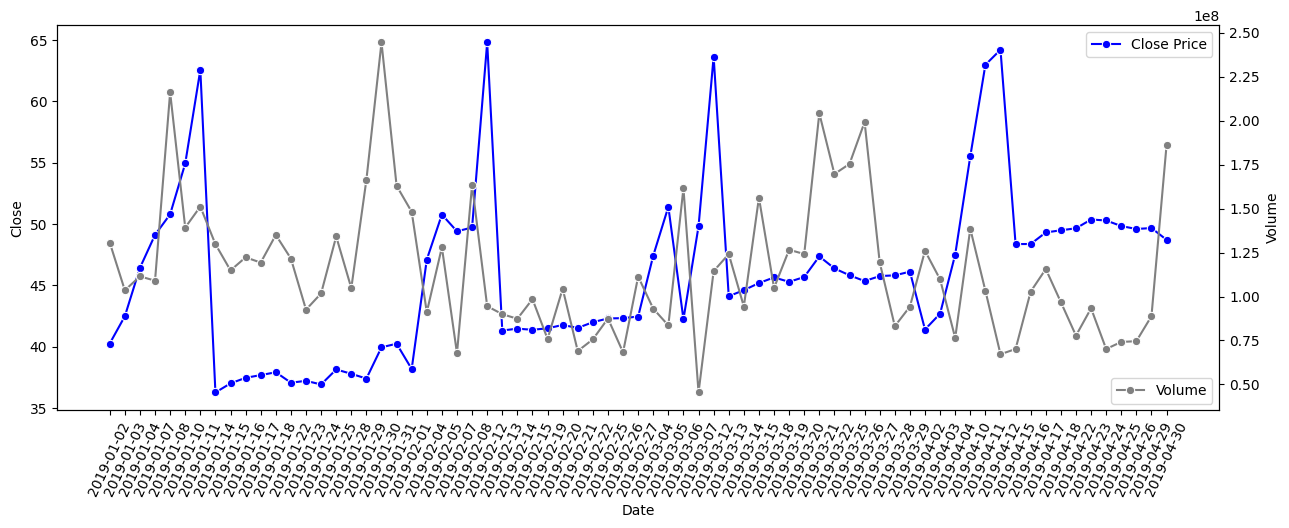

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')
plt.setp(ax1.get_xticklabels(), rotation=65)
# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));
ax2.legend(bbox_to_anchor=(1,0.1));

* Close price  and  volume  show some correlation, with price spikes often aligning with increased trading activity
* There are periods where trading volume is high but price movement is limited, indicating that heavy trading does not always lead to significant price changes
* Sharp declines in price occasionally occur despite moderate trading volume, which could be due to external factors such as negative news or market corrections

## **Data Preprocessing**

In [ ]:
#print the statistical summary of the date column
stock_copy['Date'].describe()

,Date
count,349
unique,71
top,2019-01-03
freq,28


* The most frequent date is January 3, 2019, with 28 occurrences, suggesting that a significant event or high media coverage happened on this day
* There is an uneven distribution of news across dates, meaning that some days had significantly more news coverage than others


**Remove special characters**

In [ ]:
# A function to remove special characters from a given text
def remove_special_characters(text):
  #Defining the regex pattern to match non-alphanumeric characters
  pattern = '[^A-Za-z0-9]+'

  #finding the specified pattern and replacing non-alphanumeric characters with a blank string
  new_text = ''.join(re.sub(pattern, ' ', text))

  return new_text

In [ ]:
#Applying the function to remove special characters
stock_copy['cleaned_news'] = stock_copy['News'].apply(remove_special_characters)

In [ ]:
#Checking a few edited news using print
stock_copy.loc[0:3, ['News', 'cleaned_news']]

,News,cleaned_news
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",The tech sector experienced a significant decline in the aftermarket following Apple s Q1 revenue warning Notable suppliers including Skyworks Broadcom Lumentum Qorvo and TSMC saw their stocks drop in response to Apple s downward revision of its revenue expectations for the quarter previously announced in January
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",Apple lowered its fiscal Q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iPhone sales The announcement caused a significant drop in Apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as Nasdaq 10
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",Apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in China and fewer iPhone upgrades CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks Apple s shares fell 8 5 in post market trading while Asian suppliers like Hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",This news article reports that yields on long dated U S Treasury securities hit their lowest levels in nearly a year on January 2 2019 due to concerns about the health of the global economy following weak economic data from China and Europe as well as the partial U S government shutdown Apple


**Lowercasing**

In [ ]:
#Change the case of the text data to lower case
stock_copy['cleaned_news'] = stock_copy['cleaned_news'].str.lower()

In [ ]:
#Display the news at several locations
stock_copy.loc[0:3, ['News', 'cleaned_news']]

,News,cleaned_news
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple


**Removing extra white spaces**

In [ ]:
# Remove extra white spaces from the text
stock_copy['cleaned_news'] = stock_copy['cleaned_news'].apply(lambda x: ' '.join(x.split()))

In [ ]:
# Display a few edited news articles
stock_copy.loc[0:3, ['News', 'cleaned_news']]

,News,cleaned_news
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple


**Removing stopwords**

In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
# Apply the remove_stopwords function to the news
stock_copy['cleaned_news_no_sw'] = stock_copy['cleaned_news'].apply(remove_stopwords)

In [ ]:
# Display a few edited articels
stock_copy.loc[0:3, ['cleaned_news', 'cleaned_news_no_sw']]

,cleaned_news,cleaned_news_no_sw
0,the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january,tech sector experienced significant decline aftermarket following apple q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo tsmc saw stocks drop response apple downward revision revenue expectations quarter previously announced january
1,apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10,apple lowered fiscal q1 revenue guidance 84 billion earlier estimates 89 93 billion due weaker expected iphone sales announcement caused significant drop apple stock price negatively impacted related suppliers leading broader market declines tech indices nasdaq 10
2,apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon,apple cut fiscal first quarter revenue forecast 89 93 billion 84 billion due weaker demand china fewer iphone upgrades ceo tim cook also mentioned constrained sales airpods macbooks apple shares fell 8 5 post market trading asian suppliers like hon
3,this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple,news article reports yields long dated u treasury securities hit lowest levels nearly year january 2 2019 due concerns health global economy following weak economic data china europe well partial u government shutdown apple


**Stemming**

In [ ]:
#Use the PorterStemmer class to stem the words
ps = nltk.stem.PorterStemmer()

In [ ]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [ ]:
#Apply the apply_porter_stemmer function to our text
stock_copy['final_cleaned_text'] = stock_copy['cleaned_news_no_sw'].apply(apply_porter_stemmer)

In [ ]:
#Display a few articles
stock_copy.loc[0:3, ['cleaned_news_no_sw', 'final_cleaned_text']]

,cleaned_news_no_sw,final_cleaned_text
0,tech sector experienced significant decline aftermarket following apple q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo tsmc saw stocks drop response apple downward revision revenue expectations quarter previously announced january,tech sector experienc signific declin aftermarket follow appl q1 revenu warn notabl supplier includ skywork broadcom lumentum qorvo tsmc saw stock drop respons appl downward revis revenu expect quarter previous announc januari
1,apple lowered fiscal q1 revenue guidance 84 billion earlier estimates 89 93 billion due weaker expected iphone sales announcement caused significant drop apple stock price negatively impacted related suppliers leading broader market declines tech indices nasdaq 10,appl lower fiscal q1 revenu guidanc 84 billion earlier estim 89 93 billion due weaker expect iphon sale announc caus signific drop appl stock price neg impact relat supplier lead broader market declin tech indic nasdaq 10
2,apple cut fiscal first quarter revenue forecast 89 93 billion 84 billion due weaker demand china fewer iphone upgrades ceo tim cook also mentioned constrained sales airpods macbooks apple shares fell 8 5 post market trading asian suppliers like hon,appl cut fiscal first quarter revenu forecast 89 93 billion 84 billion due weaker demand china fewer iphon upgrad ceo tim cook also mention constrain sale airpod macbook appl share fell 8 5 post market trade asian supplier like hon
3,news article reports yields long dated u treasury securities hit lowest levels nearly year january 2 2019 due concerns health global economy following weak economic data china europe well partial u government shutdown apple,news articl report yield long date u treasuri secur hit lowest level nearli year januari 2 2019 due concern health global economi follow weak econom data china europ well partial u govern shutdown appl


**Split our data using date ( validation, test and train)**

In [ ]:
#Complete the code to select all rows where the 'Date' is before '2019-04-01'
X_train = stock_copy[stock_copy['Date'] < '2019-04-01'].reset_index()
#the code to select all rows where the 'Date' is from '2019-04-01 to '2019-04-16' (excluded)
X_val = stock_copy[(stock_copy['Date'] >= '2019-04-01') & (stock_copy['Date'] < '2019-04-16')].reset_index()
#select all rows where the 'Date' is from '2019-04-16' till the end.
X_test = stock_copy[stock_copy['Date'] >= '2019-04-16'].reset_index()

In [ ]:
# Pick the 'Label' column as the target variable
y_train = X_train['Label'].copy()
y_val = X_val['Label'].copy()
y_test = X_test['Label'].copy()

In [ ]:
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 13)
Validation data shape (21, 13)
Test data shape  (42, 13)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


## **Word Embeddings**

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock_copy['final_cleaned_text'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_w2v = Word2Vec(sentences=words_list, vector_size=vec_size, window=5, min_count=1, workers=8)

In [ ]:
# Checking the size of the vocabulary
print(f"Vocabulary size: {len(model_w2v.wv.key_to_index)}")

Vocabulary size: 2580


In [ ]:
# Checking the word embedding of a random word
model_w2v.wv['quarter']

array([-1.05898129e-03,  7.16887880e-03, -9.96615272e-04,  3.14433652e-04,
        3.00759380e-03, -6.27194438e-03,  1.09284290e-03,  1.47555079e-02,
        3.80875287e-03, -1.22158043e-03, -2.28655510e-04, -1.01869032e-02,
        3.23853601e-04,  1.30694173e-03, -3.74182314e-03, -6.33801194e-03,
        5.16321044e-03, -4.42969007e-03,  2.71484884e-03, -1.88828050e-03,
       -3.55486968e-03, -1.03340088e-03,  5.05997753e-03, -1.47836306e-03,
        7.82522652e-03,  3.59542319e-03, -5.58347069e-03, -1.35908974e-03,
       -7.54231913e-03, -3.50775779e-03,  3.48767475e-03, -1.38837332e-03,
       -2.39874539e-03, -1.20117830e-03, -4.56557609e-03,  3.16823646e-03,
        4.96064546e-04, -7.21269893e-03,  3.71706905e-03, -6.05510955e-04,
       -3.74481804e-03, -2.59813108e-03,  1.43837277e-03, -1.42493506e-03,
        4.84208763e-03,  6.90150121e-03,  1.42300583e-03,  2.29557534e-03,
        5.38999564e-04,  5.48135582e-03, -2.14662217e-03,  1.21710109e-04,
       -1.78053568e-03,  

In [ ]:
# Checking the word embedding of a random word
word = "demand"
model_w2v.wv[word]

array([-7.73795764e-04,  8.89946334e-03, -4.10411181e-03,  6.02843240e-03,
       -2.58810061e-04, -7.52102444e-03,  1.45417894e-03,  1.45386560e-02,
       -6.55492418e-04,  1.87624351e-03, -7.78103364e-04, -6.13558618e-03,
        2.87531829e-03,  2.34632613e-03, -4.28738538e-03, -5.55462949e-03,
        2.30097631e-03, -1.99201494e-03,  3.70032201e-03, -1.42550992e-03,
       -6.41197478e-03, -2.19838321e-03,  5.50624821e-03, -1.44778460e-03,
        7.80866249e-03,  3.37969465e-03, -9.80577711e-03, -2.85195257e-03,
       -6.46679522e-03, -3.17595969e-03,  1.73649983e-03, -4.21545049e-03,
       -2.04000680e-04, -2.73244968e-03, -1.66871399e-03,  2.23935279e-03,
       -3.67100118e-04, -4.92602587e-03, -5.76444494e-04, -1.55986811e-03,
       -2.24134047e-03, -2.73720245e-03, -2.43955385e-03, -8.30717501e-04,
        4.65841684e-03,  9.61487554e-03,  9.19927494e-04,  1.30731112e-03,
       -7.20320444e-04,  5.38949436e-03,  1.20254571e-03,  2.10898533e-03,
       -2.78451922e-03,  

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_w2v.wv.key_to_index)

# Retrieving word vectors for all the words present in the model's vocabulary
word_vectors = model_w2v.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, word_vectors))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["final_cleaned_text"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["final_cleaned_text"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["final_cleaned_text"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))


Time taken  0.27447056770324707


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


**Glove**

In [ ]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [ ]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random word
word = "price"
glove_model[word]

array([ 3.3108e-01,  1.9364e-01,  1.6607e-01,  8.6574e-02, -2.0639e-01,
       -1.4334e+00, -2.9923e-01, -1.1618e-01, -6.6627e-01, -1.4150e-01,
        2.1907e-01,  1.6721e-01, -1.6150e-01, -2.8570e-01,  2.7179e-01,
        9.5956e-02, -9.7168e-01,  1.0444e-01,  1.0485e-01,  1.3673e-01,
        8.3398e-01, -6.8866e-01,  2.6409e-01,  2.9890e-01,  5.9473e-01,
        1.4549e-02,  1.7850e-02, -9.5206e-01, -6.6171e-01, -2.2428e-01,
        3.2354e-01,  5.7278e-01, -7.1502e-02, -1.4367e-01,  3.1574e-01,
        7.4511e-01,  7.5837e-01, -1.7850e-03,  1.0807e-01, -9.9260e-01,
        2.5383e-01, -5.2487e-01, -1.3455e-01, -3.1672e-01,  3.7978e-02,
        4.0723e-01, -5.5722e-01, -1.0508e+00,  5.0940e-03, -1.4605e+00,
        8.2840e-01, -1.4003e-01, -9.2980e-03,  8.4426e-01, -2.6589e-01,
       -2.1714e+00, -5.7227e-02, -1.6759e-01,  2.0411e+00, -2.6865e-01,
        4.3311e-01, -4.7494e-01, -8.3282e-01,  4.2100e-01,  3.4240e-01,
       -5.1296e-01,  6.7027e-01, -2.9009e-01,  7.7592e-01, -1.89

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["final_cleaned_text"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_val_gl = pd.DataFrame(X_val["final_cleaned_text"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_gl = pd.DataFrame(X_test["final_cleaned_text"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  17.35374665260315


In [ ]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)

(286, 100) (21, 100) (42, 100)


**Sentence Transformer**

In [ ]:
#Defining the model
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
start = time.time()

X_train_st = model.encode(X_train['final_cleaned_text'].tolist(), show_progress_bar=True,device=device)
X_val_st = model.encode(X_val['final_cleaned_text'].tolist(), show_progress_bar=True,device=device)
X_test_st = model.encode(X_test['final_cleaned_text'].tolist(), show_progress_bar=True,device=device)

end = time.time()
print('Time taken ', (end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  1.178987741470337


In [ ]:
print(X_train_st.shape, X_val_st.shape, X_test_st.shape)

(286, 384) (21, 384) (42, 384)


## **Sentiment Analysis**

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.


**Base Model - Word2Vec**

In [ ]:
# Building the model
base_model_w2v = RandomForestClassifier(random_state=42)
base_model_w2v.fit(X_train_wv, y_train)

RandomForestClassifier(random_state=42)

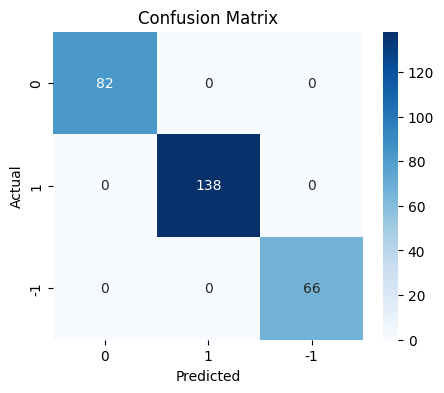

In [ ]:
plot_confusion_matrix(base_model_w2v, X_train_wv, y_train)

* The model demonstrates perfect classification accuracy, as all predictions match the actual labels (no misclassifications)

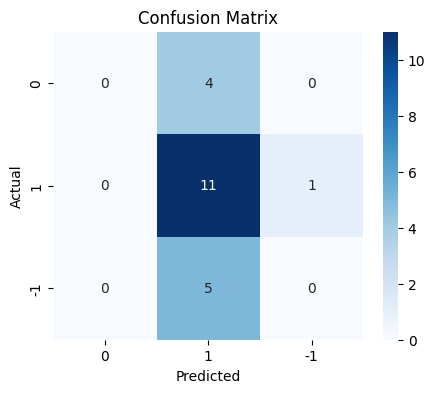

In [ ]:
plot_confusion_matrix(base_model_w2v, X_val_wv, y_val)

* The model struggles with negative sentiment, misclassifying all instances as neutral or positive
* The model perfomrs better in detecting positive sentiment, but needs improvement in distinguishing between neutral and negative sentiments

In [ ]:
#Calculating different metrics on training data
base_train_w2v = model_performance_classification_sklearn(base_model_w2v, X_train_wv, y_train)
print("Train data performance \n",base_train_w2v)

Train data performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00


In [ ]:
#Calculating different metrics on validation data
base_val_w2v = model_performance_classification_sklearn(base_model_w2v, X_val_wv, y_val)
print("Validation data performance \n",base_val_w2v)

Validation data performance 
    Accuracy  Recall  Precision   F1
0      0.52    0.52       0.31 0.39


* Validation performance drops significantly, suggesting that the model does not generalize well to unseen data
* The precision  and F1-score  on validation data are particularly low, meaning the model struggles to correctly classify sentiment, especially for certain classes

**Base Model - GloVe**

In [ ]:
#Bilding the model
base_model_glv = RandomForestClassifier(random_state=42)
base_model_glv.fit(X_train_gl, y_train)

RandomForestClassifier(random_state=42)

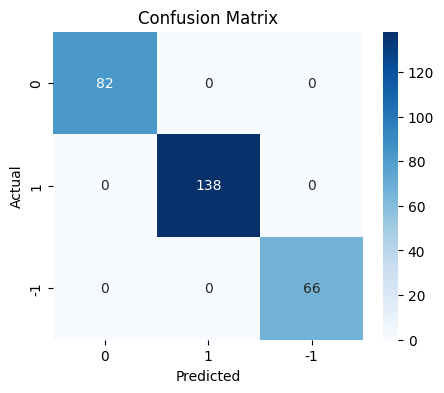

In [ ]:
plot_confusion_matrix(base_model_glv, X_train_gl, y_train)

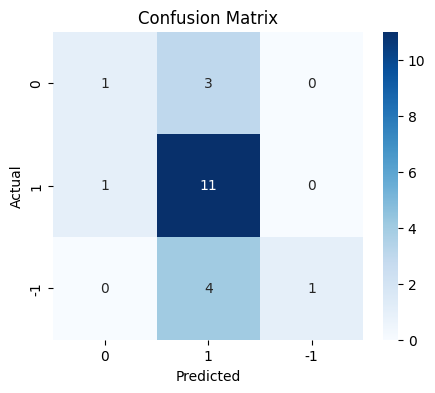

In [ ]:
plot_confusion_matrix(base_model_glv, X_val_gl, y_val)

* The model struggles to classify neutral and negative sentiments correctly, with multiple misclassifications as positive
* The positive class is detected well , but some neutral and negative samples are misclassified as positive
* The negative sentiment class  has the lowest performance, with only 1 correct prediction and 4 misclassifications as positive

In [ ]:
#Calculating different metrics on training data
base_train_glv = model_performance_classification_sklearn(base_model_glv, X_train_gl, y_train)
print("Train data performance \n",base_train_glv)

Train data performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00


In [ ]:
#Calculating different metrics on validation data
base_val_glv = model_performance_classification_sklearn(base_model_glv, X_val_gl, y_val)
print("Validation data performance \n",base_val_glv)

Validation data performance 
    Accuracy  Recall  Precision   F1
0      0.62    0.62       0.68 0.56


* The glove model is generally better than the word2vec model
* Glove validation performance has improved compared to the word2vec validation but still shows a gap between training and validation results
* Precision is higher than recall , meaning the model is more confident in its positive predictions but still misses some correct classifications

**Base Model - Sentence Transformer**

In [ ]:
# Building the model
base_model_st = RandomForestClassifier(random_state=42)
base_model_st.fit(X_train_st, y_train)

RandomForestClassifier(random_state=42)

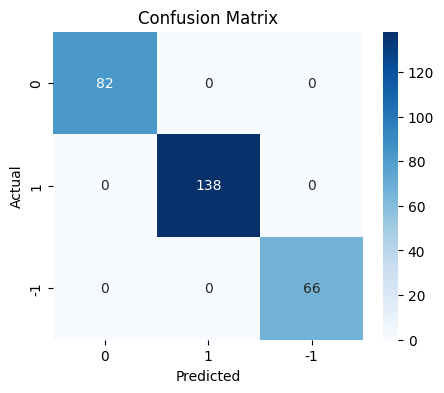

In [ ]:
plot_confusion_matrix(base_model_st, X_train_st, y_train)

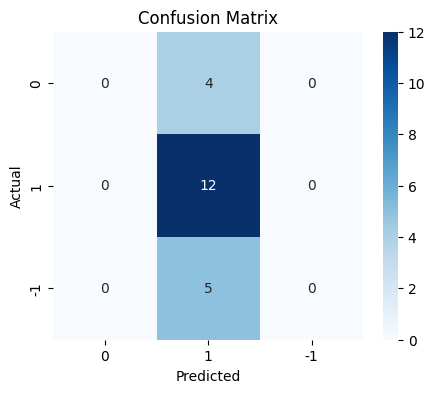

In [ ]:
plot_confusion_matrix(base_model_st, X_val_st, y_val)

* The model fails to classify neutral and negative sentiments correctly, misclassifying all instances as positive
* The positive class is correctly identified, but the lack of true neutral and negative classifications suggests poor class balance or overfitting

In [ ]:
#Calculating different metrics on training data
base_train_st = model_performance_classification_sklearn(base_model_st, X_train_st, y_train)
print("Train data performance \n",base_train_st)

Train data performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00


In [ ]:
#Calculating different metrics on validation data
base_val_st = model_performance_classification_sklearn(base_model_st, X_val_st, y_val)
print("Validation data performance \n",base_val_st)

Validation data performance 
    Accuracy  Recall  Precision   F1
0      0.57    0.57       0.33 0.42


* Validation accuracy is low , and precision  is significantly worse than recall, meaning the model makes many false positive predictions
* The F1-score suggests poor balance between precision and recall, making the model unreliable for real-world sentiment classification

**Tuned Model - Word2vec**

In [ ]:
start = time.time()

tuned_model_w2v = RandomForestClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

#run the grid search
grid_search = GridSearchCV(tuned_model_w2v, parameters, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search.fit(X_train_wv, y_train)

end = time.time()
print('Time taken ', (end-start))

# Set the clf to the best combination of parameters
tuned_model_w2v = grid_search.best_estimator_


Time taken  128.2544858455658


In [ ]:
tuned_model_w2v.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=5, max_features=0.4, min_samples_split=5,
                       random_state=42)

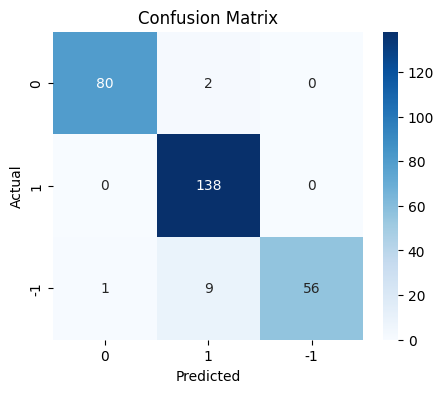

In [ ]:
plot_confusion_matrix(tuned_model_w2v, X_train_wv, y_train)

* The tuned model is slightly more realistic than the base model as it shows minor misclassifications

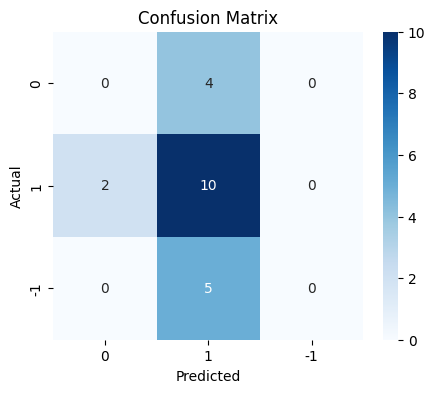

In [ ]:
plot_confusion_matrix(tuned_model_w2v, X_val_wv, y_val)

* The model completely fails to predict the negative sentiment, misclassifying all negative instances as positive
* Neutral sentiment is also misclassified entirely, with all cases being predicted as positive

In [ ]:
#Calculating different metrics on training data
tuned_train_w2v = model_performance_classification_sklearn(tuned_model_w2v, X_train_wv, y_train)
print("Train data performance \n",tuned_train_w2v)

Train data performance 
    Accuracy  Recall  Precision   F1
0      0.96    0.96       0.96 0.96


In [ ]:
#Calculating different metrics on validation data
tuned_val_w2v = model_performance_classification_sklearn(tuned_model_w2v, X_val_wv, y_val)
print("Validation data performance \n",tuned_val_w2v)

Validation data performance 
    Accuracy  Recall  Precision   F1
0      0.48    0.48       0.30 0.37


* The large gap between training and validation scores strongly suggests overfitting, meaning the model memorizes patterns instead of learning generalizable features

**Tuned Model - GloVe**

In [ ]:
start = time.time()

#Building the model
tuned_model_glv = RandomForestClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

#run the grid search
grid_search = GridSearchCV(tuned_model_glv, parameters, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search.fit(X_train_gl, y_train)

end = time.time()
print('Time taken ', (end-start))

# Set the clf to the best combination of parameters
tuned_model_glv = grid_search.best_estimator_

Time taken  74.22187232971191


In [ ]:
tuned_model_glv.fit(X_train_gl, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=11,
                       random_state=42)

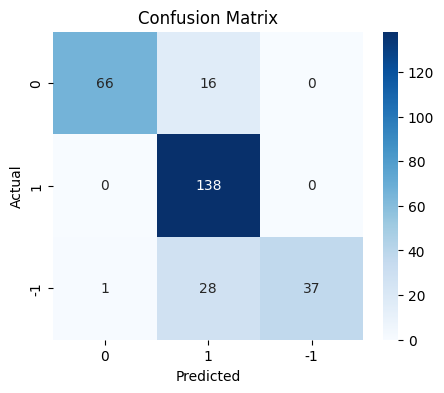

In [ ]:
plot_confusion_matrix(tuned_model_glv, X_train_gl, y_train)

* The tuned model is more realistic but struggles with negative sentiment misclassification, requiring better handling of class imbalances

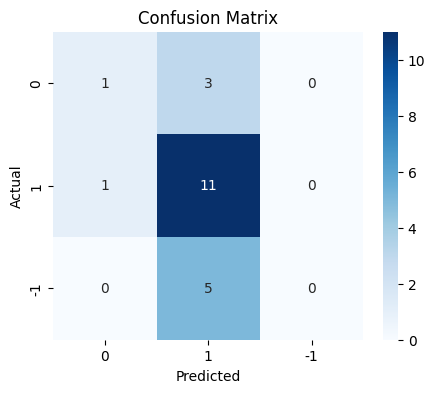

In [ ]:
plot_confusion_matrix(tuned_model_glv, X_val_gl, y_val)

* The model struggles with neutral and negative sentiment classification, misclassifying multiple instances
* The model is biased towards the positive sentiment class

In [ ]:
#Calculating different metrics on training data
tuned_train_glv = model_performance_classification_sklearn(tuned_model_glv, X_train_gl, y_train)
print("Train data performance \n",tuned_train_glv)

Train data performance 
    Accuracy  Recall  Precision   F1
0      0.84    0.84       0.88 0.84


In [ ]:
#Calculating different metrics on validation data
tuned_val_glv = model_performance_classification_sklearn(tuned_model_glv, X_val_gl, y_val)
print("Validation data performance \n",tuned_val_glv)

Validation data performance 
    Accuracy  Recall  Precision   F1
0      0.57    0.57       0.43 0.47


* The training accuracy is significantly higher than the validation accuracy, suggesting some level of overfitting
* Precision on validation data is lower than recall, indicating that the model makes a considerable number of false positive predictions

**Tuned Model - Sentence transformer**

In [ ]:
start = time.time()

tuned_model_glv = RandomForestClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

#run the grid search
grid_search = GridSearchCV(tuned_model_glv, parameters, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_model_st = grid_search.best_estimator_

Time taken  145.59504628181458


In [ ]:
tuned_model_st.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=11,
                       random_state=42)

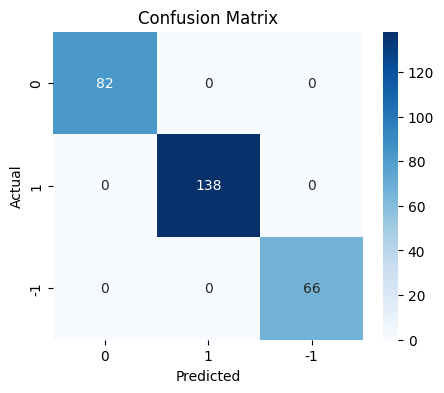

In [ ]:
plot_confusion_matrix(tuned_model_st, X_train_st, y_train)

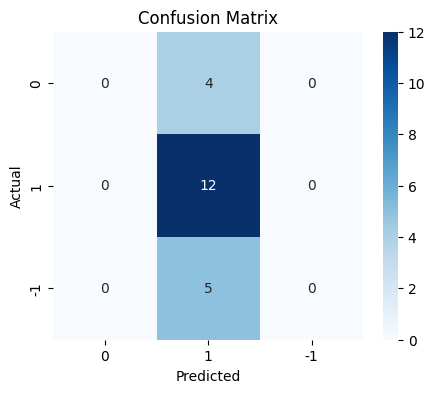

In [ ]:
plot_confusion_matrix(tuned_model_st, X_val_st, y_val)

* The tuned model and the base model predictions are the same, meaning the tuning has no effect on the outcome of the predictions

In [ ]:
#Calculating different metrics on training data
tuned_train_st = model_performance_classification_sklearn(tuned_model_st, X_train_st, y_train)
print("Train data performance \n",tuned_train_st)

Train data performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00


In [ ]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_model_st, X_val_st, y_val)
print("Validation data performance \n",tuned_val_st)

Validation data performance 
    Accuracy  Recall  Precision   F1
0      0.57    0.57       0.33 0.42


* The tuned model and the base model predictions are the same, meaning the tuning has no effect on the outcome of the predictions

**Model Performance Summary and Final Model Selection**

In [ ]:
#training performance comparison
train_performance = pd.concat([base_train_w2v, tuned_train_w2v, base_train_glv, tuned_train_glv, base_train_st, tuned_train_st], axis=1)

# Get existing column names
existing_columns = train_performance.columns

# Create a list of new column names with the same length as existing columns
new_columns = ['Base_w2v', 'Tuned_w2v', 'Base_glv', 'Tuned_glv', 'Base_st', 'Tuned_st']
# Extend the list with generic names for remaining columns or investigate to assign better names

# Add placeholder column names if needed (In this case 24 - 6 = 18 more column names needed)
new_columns.extend([f'Column_{i}' for i in range(len(existing_columns) - len(new_columns))])

# Assign new column names
train_performance.columns = new_columns


print("Training performance comparison:")
train_performance

Training performance comparison:


,Base_w2v,Tuned_w2v,Base_glv,Tuned_glv,Base_st,Tuned_st,Column_0,Column_1,Column_2,Column_3,...,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17
0,1.00,1.00,1.00,1.00,0.96,0.96,0.96,0.96,1.00,1.00,...,0.88,0.84,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
#validation performance comparison
val_performance = pd.concat([base_val_w2v, tuned_val_w2v, base_val_glv, tuned_val_glv, base_val_st, tuned_val_st], axis=1)

# Get existing column names
existing_columns = val_performance.columns

# Create a list of new column names with the same length as existing columns
new_columns = ['Base_w2v', 'Tuned_w2v', 'Base_glv', 'Tuned_glv', 'Base_st', 'Tuned_st']

# Extend the list with generic names for remaining columns or investigate to assign better names
new_columns.extend([f'Column_{i}' for i in range(len(existing_columns) - len(new_columns))])

# Assign new column names
val_performance.columns = new_columns

print("Validation performance comparison:")
val_performance

Validation performance comparison:


,Base_w2v,Tuned_w2v,Base_glv,Tuned_glv,Base_st,Tuned_st,Column_0,Column_1,Column_2,Column_3,...,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17
0,0.52,0.52,0.31,0.39,0.48,0.48,0.30,0.37,0.62,0.62,...,0.43,0.47,0.57,0.57,0.33,0.42,0.57,0.57,0.33,0.42


* While Tuned_w2v has slightly better validation accuracy, Tuned_st is a stronger candidate for real-world applications, especially if the dataset varies in structure, vocabulary, and sentence complexity
* A tuned model is likely the best option, as fine-tuned models generally adapt better to specific datasets and tasks

**Model Performance Check on Test Data**

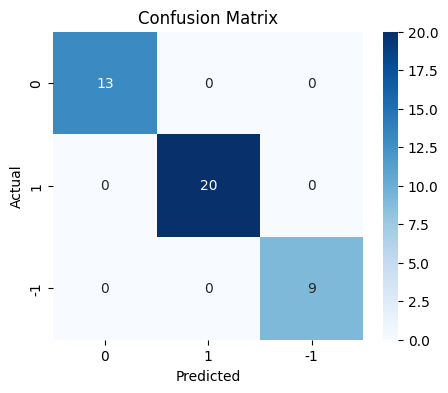

In [ ]:
# plot the confusion matrix for the final model and test data
tuned_model_st.fit(X_test_st, y_test)
plot_confusion_matrix(tuned_model_st, X_test_st, y_test)

In [ ]:
#Calculating different metrics on test data
tuned_test_st = model_performance_classification_sklearn(tuned_model_st, X_test_st, y_test)
print("Test data performance \n",tuned_test_st)

Test data performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00


* It shows a perfect prediction on the test data

## **Weekly News Summarization**

### Importing the necessary libraries

In [1]:
import pandas as pd

In [3]:
#Install Llama and use GPU
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 137.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 153.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 156.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.3 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2

In [4]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd
import numpy as np

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

### Loading the data

In [2]:
stock_info = pd.read_csv('stock_news.csv')
df = stock_info.copy()

### Loading the model

In [5]:
import os
from huggingface_hub import login

# Log in to Hugging Face with the API key stored in Colab
try:
  HF_TOKEN = os.environ['HF_TOKEN']
except:
  print("No Hugging Face token detected. Add it as a secret named 'HF_TOKEN'")
else:
  login(token = HF_TOKEN)

No Hugging Face token detected. Add it as a secret named 'HF_TOKEN'


In [6]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [7]:
llm = Llama(
    model_path=model_path,
    n_gpu_layers=100,
    n_ctx=4500
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### Aggregating the data weekly

In [8]:
# Convert the 'Date' column to datetime format.
df["Date"] = pd.to_datetime(df['Date'])

In [9]:
# Group the data by week using the 'Date' column.
weekly_grouped = df.groupby(pd.Grouper(key='Date', freq='W'))

In [10]:
# Aggregate the grouped data on a weekly basis:
# concatenate 'content' values into a single string separated by ' || '.
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [11]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [12]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [13]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [14]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=1000,
      temperature=0.2,
      top_p=0.95,
      top_k=50,
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [15]:
news = data_1.loc[0, 'News']

In [16]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [17]:
#Define the prompt for this task
prompt = """
You are an expert in stock markert news summirization.
You will be provided with multiple news articles, each separated by '||'.
Read through each of the news articles and extract the top three positive and negative events that are most likely to impact the price of the stock's perfomance.
Consider factors such as market trends, company announcements, economic indicators and any other relevant information.
Return the output in JSON format as follows:
{
  "Positive Events": [
    "Event 1",
    "Event 2",
    "Event 3"
  ],
  "Negative Events": [
    "Event 4",
    "Event 5",
    "Event 6"]
}
"""

In [18]:
%%time
summary = response_mistral_1(prompt, news)
print(summary)

 {
          "Positive Events": [
            "Roku Inc announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel.",
            "The Chinese central bank announced a fifth reduction in the required reserve ratio (RRR) for banks, freeing up approximately 116.5 billion yuan for new lending.",
            "Positive news about US-China trade talks and dovish comments from Federal Reserve Chairman Jerome Powell led to a strong stock market rebound on Friday."
          ],
          "Negative Events": [
            "Apple cut its quarterly revenue forecast for the first time in over 15 years due to weak iPhone sales in China, representing around 20% of Apple's revenue.",
            "Fears of a global economic slowdown led to significant losses for Japanese stocks on the first trading day of 2019, with the Nikkei 225 and Topix indices both falling over 3 percent.",
            "Investors withdrew a record $98 billion from U.

##### Checking the model output on the weekly data

In [19]:
%%time
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

100%|██████████| 18/18 [04:23<00:00, 14.63s/it]

CPU times: user 3min 57s, sys: 25 s, total: 4min 22s
Wall time: 4min 23s


In [20]:
# Print the first 5 rows of the 'Key_Events' column
data_1['Key Events'].head()

,Key Events
0,"{\n ""Positive Events"": [\n ..."
1,"{\n ""Positive Events"": [\n ..."
2,"{\n ""Positive Events"": [\n ..."
3,"{\n ""Positive Events"": [\n ..."
4,"{\n ""Positive Events"": [\n ..."


##### Formatting the model output

In [21]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

,Date,News,Key Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""Positive Events"": [\n ...",{'Positive Events': ['Roku Inc announced plans...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""Positive Events"": [\n ...",{'Positive Events': ['Sprint and Samsung's pla...
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""Positive Events"": [\n ...",{'Positive Events': ['Dialog Semiconductor rep...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""Positive Events"": [\n ...",{'Positive Events': ['IBM's better-than-expect...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""Positive Events"": [\n ...",{'Positive Events': ['Apple reported spending ...


In [22]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

,Positive Events,Negative Events
0,[Roku Inc announced plans to offer premium vid...,[Apple cut its fiscal first quarter revenue fo...
1,[Sprint and Samsung's plan to release 5G smart...,[Geely forecasting flat sales for 2019 due to ...
2,[Dialog Semiconductor reported revenue in line...,[The U.S. stock market declined due to concern...
3,[IBM's better-than-expected earnings and reven...,[Swiss National Bank's emphasis on negative in...
4,[Apple reported spending over $60 billion with...,[Caterpillar Inc reported lower-than-expected ...


In [23]:
final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

final_output.head()

,Week End Date,News,Week Positive Events,Week Negative Events
0,2019-01-06,The tech sector experienced a significant dec...,[Roku Inc announced plans to offer premium vid...,[Apple cut its fiscal first quarter revenue fo...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,[Sprint and Samsung's plan to release 5G smart...,[Geely forecasting flat sales for 2019 due to ...
2,2019-01-20,The U.S. stock market declined on Monday as c...,[Dialog Semiconductor reported revenue in line...,[The U.S. stock market declined due to concern...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",[IBM's better-than-expected earnings and reven...,[Swiss National Bank's emphasis on negative in...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,[Apple reported spending over $60 billion with...,[Caterpillar Inc reported lower-than-expected ...


## **Conclusions and Recommendations**

* Stock prices (open, high, low, close) show similar distributions across sentiment polarities. Negative sentiment news lowers all price points
* We predicted market news sentiment by encoding it with various methods and applying an ML model
* Minimal price variation led to perfect correlation among prices and a slight negative correlation with volume, likely due to selling pressure during negative sentiment
* All models overfitted to some extent; the chosen model had the least overfitting

**RECOMMENDATIONS**
* Consider combining news sentiment with technical and fundamental indicators. Add data from similar stocks for a deeper market analysis
* Expand the data with more data collection
* Consider using LangChain for better prompt structuring



<font size=6 color='blue'>Power Ahead</font>
___